# Clustering model using NBA shot logs by Kiwook Kwon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

pd.options.mode.chained_assignment = None

raw_data = pd.read_csv("shot_logs.csv", low_memory = False)
processed_data = raw_data

Convert "made" as 1 and "missed" as 0

In [2]:
processed_data['SHOT_RESULT'] = processed_data['SHOT_RESULT'].apply(lambda x: 0 if x == "missed" else 1)

# If you want to see individual player's performance, please remove "#" in the line below
#processed_data = processed_data[processed_data['player_name']=='stephen curry']

Remove missed shot and unreasonable conditions (too close or too far from the basket, and defender is too far from the shooter)

In [3]:
variables = ['SHOT_RESULT','SHOT_DIST','CLOSE_DEF_DIST']

# dataset with shot made
cluster_data_made = processed_data[variables]
cluster_data_made = cluster_data_made[cluster_data_made['SHOT_RESULT'] == 1]
cluster_data_made = cluster_data_made[cluster_data_made['SHOT_DIST'] > 5]
cluster_data_made = cluster_data_made[cluster_data_made['SHOT_DIST'] < 35]
cluster_data_made = cluster_data_made[cluster_data_made['CLOSE_DEF_DIST'] < 8]

cluster_data_made = cluster_data_made.drop('SHOT_RESULT',axis=1)
samples_made = cluster_data_made

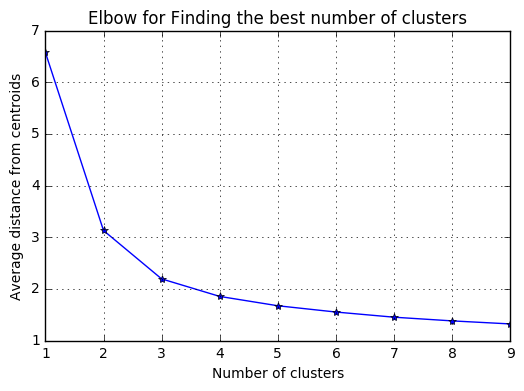

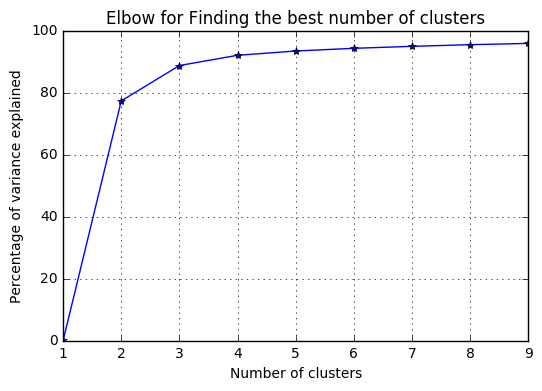

In [4]:
# Finding best number of clusters
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(samples_made) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(samples_made, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/samples_made.shape[0] for d in dist]

# sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(samples_made)**2)/samples_made.shape[0]
bss = tss-wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance from centroids')
plt.title('Elbow for Finding the best number of clusters')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for Finding the best number of clusters')
plt.show()

Cluster 0 contains 10681 samples
Cluster 1 contains 9384 samples
Cluster 2 contains 5044 samples
Cluster 3 contains 7976 samples


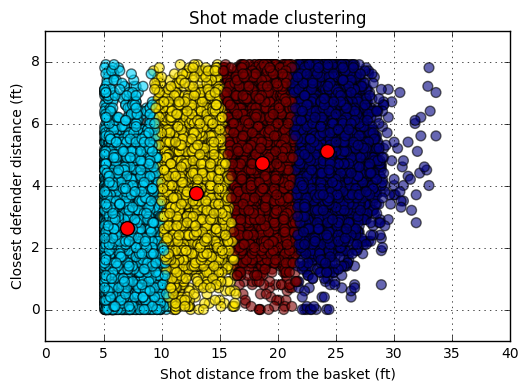

In [5]:
# Perform k-means clustering

cluster_number = 4
kmeans = KMeans(n_clusters=cluster_number, n_jobs=-1).fit(samples_made)
y_kmeans = kmeans.predict(samples_made)
plotArray = samples_made.as_matrix()
labels = kmeans.labels_
cnt_label = Counter(labels)

plt.scatter(plotArray[:, 0], plotArray[:, 1], c=y_kmeans, s=50, alpha=0.6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
plt.grid(True)
plt.xlabel('Shot distance from the basket (ft)')
plt.ylabel('Closest defender distance (ft)')
plt.title('Shot made clustering')

for cluster_num in range(cluster_number):
    print("Cluster {} contains {} samples".format(cluster_num, cnt_label[cluster_num]))

plt.show()

X axis is distance from the basket and Y axis is the closest defeneder's distance. red dots mean each cluster's centorid. You can use this clustering model to evaluate offence performance each player (removing comment block in the second cell)